# Happiness Investigation

## Data Preparation

In [2]:

import pandas as pd

In [3]:
# Importing clean dataset
df = pd.read_csv("wooldridge happiness.csv", index_col=0)
df

,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,teens,...,occattend,regattend,y94,y96,y98,y00,y02,y04,y06,unem10
rownames,,,,,,,,,,,,,,,,,,,,,
1,1994,keeping house,46.0,NaN,iap,12.0,middle atlantic,2.0,3.0,0.0,...,1.0,0.0,1,0,0,0,0,0,0,1.0
2,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
3,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,NaN
4,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1.0
5,1994,working parttime,36.0,NaN,NaN,13.0,middle atlantic,0.0,1.0,1.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17133,2006,keeping house,29.0,NaN,NaN,9.0,mountain,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,1,NaN
17134,2006,temp not working,51.0,NaN,iap,16.0,e. nor. central,0.0,1.0,1.0,...,1.0,0.0,0,0,0,0,0,0,1,0.0
17135,2006,retired,NaN,yes,NaN,8.0,mountain,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,1,0.0


### Data exploration

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17137 entries, 1 to 17137
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17137 non-null  int64  
 1   workstat     17134 non-null  object 
 2   prestige     16283 non-null  float64
 3   divorce      9754 non-null   object 
 4   widowed      11096 non-null  object 
 5   educ         17093 non-null  float64
 6   reg16        17137 non-null  object 
 7   babies       17036 non-null  float64
 8   preteen      17036 non-null  float64
 9   teens        17049 non-null  float64
 10  income       15045 non-null  object 
 11  region       17137 non-null  object 
 12  attend       16864 non-null  object 
 13  happy        17137 non-null  object 
 14  owngun       11297 non-null  object 
 15  tvhours      11794 non-null  float64
 16  vhappy       17137 non-null  int64  
 17  mothfath16   17132 non-null  float64
 18  black        17137 non-null  int64  
 19  gwbu

In [121]:
df.isna().sum()

year               0
workstat           3
prestige         854
divorce         7383
widowed         6041
educ              44
reg16              0
babies           101
preteen          101
teens             88
income          2092
region             0
attend           273
happy              0
owngun          5840
tvhours         5343
vhappy             0
mothfath16         5
black              0
gwbush04       15207
female             0
blackfemale        0
gwbush00       13701
occattend        273
regattend        273
y94                0
y96                0
y98                0
y00                0
y02                0
y04                0
y06                0
unem10          5796
dtype: int64

In [122]:
df["widowed"].value_counts()

iap    10718
yes      378
Name: widowed, dtype: int64

In [123]:
df["divorce"].value_counts()

no     7421
yes    2333
Name: divorce, dtype: int64

In [124]:
df["reg16"].value_counts()

e. nor. central    3148
south atlantic     2643
middle atlantic    2620
pacific            1738
w. sou. central    1635
w. nor. central    1294
foreign            1201
e. sou. central    1169
mountain            881
new england         808
Name: reg16, dtype: int64

### Columns modifications & Data cleaning

The objective of the following codes is to encode columns to 0 & 1

In [125]:
# decided to drop the encoded year column since we want to focus on the socio-economic aspects that affect happiness
# decided to drop the reg16 / region column for similar reasons  
df = df.drop(["reg16", "region", "y94", "y96", "y98", "y00", "y02", "y04", "y06"], axis = 1)

In [126]:
# decided to change the NaN and no values to 0 and yes value to 1 because we mainly care 
# about how being divorced affects happiness
df['divorce'] = df['divorce'].map(lambda x: 1 if x == 'yes' else 0)

In [127]:
# decided to change the NaN and no values to 0 and yes value to 1 because we mainly care 
# about how being widowed affects happiness
df['widowed'] = df['widowed'].map(lambda x: 1 if x == 'yes' else 0)

In [128]:
# decided to change the NaN values to 0 because we mainly want to see how voting for G.W Bush in 2004 affects happiness
df['gwbush04'] = df['gwbush04'].map(lambda x: 1 if x == 1.0 else 0)

In [129]:
# decided to change the NaN values to 0 because we mainly want to see how voting for G.W Bush in 2000 affects happiness
df['gwbush00'] = df['gwbush00'].map(lambda x: 1 if x == 1.0 else 0)

In [130]:
# decided to change the NaN values to 0 because we mainly want to see how being unemployed in the 
# last 10 years affects happiness
df['unem10'] = df['unem10'].map(lambda x: 1 if x == 1.0 else 0)

In [131]:
# decided to change the NaN values to 0 because we mainly want to see how having a gun affects happiness
df['owngun'] = df['owngun'].map(lambda x: 1 if x == "yes" else 0)

In [132]:
df

,year,workstat,prestige,divorce,widowed,educ,babies,preteen,teens,income,...,vhappy,mothfath16,black,gwbush04,female,blackfemale,gwbush00,occattend,regattend,unem10
rownames,,,,,,,,,,,,,,,,,,,,,
1,1994,keeping house,46.0,0,0,12.0,2.0,3.0,0.0,$10000 - 14999,...,0,1.0,1,0,1,1,0,1.0,0.0,1
2,1994,working fulltime,22.0,0,0,12.0,0.0,0.0,0.0,NaN,...,1,0.0,1,0,0,0,0,0.0,0.0,0
3,1994,working fulltime,29.0,0,0,12.0,0.0,0.0,0.0,$15000 - 19999,...,0,0.0,1,0,1,1,0,0.0,1.0,0
4,1994,working fulltime,42.0,1,0,8.0,0.0,0.0,0.0,$15000 - 19999,...,0,0.0,0,0,0,0,0,0.0,0.0,1
5,1994,working parttime,36.0,0,0,13.0,0.0,1.0,1.0,$10000 - 14999,...,0,0.0,1,0,1,1,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17133,2006,keeping house,29.0,0,0,9.0,0.0,0.0,0.0,$3000 to 3999,...,0,0.0,0,0,1,0,0,0.0,0.0,0
17134,2006,temp not working,51.0,0,0,16.0,0.0,1.0,1.0,$25000 or more,...,0,1.0,0,1,0,0,1,1.0,0.0,0
17135,2006,retired,NaN,1,0,8.0,0.0,0.0,0.0,$6000 to 6999,...,0,1.0,0,0,1,0,0,0.0,0.0,0


In [133]:
df["happy"].value_counts()

pretty happy     9791
very happy       5260
not too happy    2086
Name: happy, dtype: int64

In [134]:
# We noticed that vhappy column was created using the happy column
# In order to have a different interesting target we are going to create a nothappy column using the same process
df[['happy','vhappy']]

,happy,vhappy
rownames,,
1,pretty happy,0
2,very happy,1
3,pretty happy,0
4,not too happy,0
5,not too happy,0
...,...,...
17133,pretty happy,0
17134,pretty happy,0
17135,pretty happy,0


In [135]:
# Create a new column 'nhappy' with binary values
df['nhappy'] = (df['happy'] == 'not too happy').astype(int)

In [136]:
# Verification
df[['happy','vhappy','nhappy']]

,happy,vhappy,nhappy
rownames,,,
1,pretty happy,0,0
2,very happy,1,0
3,pretty happy,0,0
4,not too happy,0,1
5,not too happy,0,1
...,...,...,...
17133,pretty happy,0,0
17134,pretty happy,0,0
17135,pretty happy,0,0


In [137]:
# Now we can drop the happy column
df = df.drop(["happy"], axis = 1)

In [138]:
# Making a copy of the data as a checkpoint
df2 = df.copy()

In [139]:
# need to manually encode income since label encoder not working
df2["income"].value_counts()

$25000 or more    9725
$20000 - 24999    1278
$10000 - 14999    1251
$15000 - 19999    1099
$8000 to 9999      399
$7000 to 7999      218
$5000 to 5999      209
$6000 to 6999      202
$1000 to 2999      182
lt $1000           176
$4000 to 4999      156
$3000 to 3999      150
Name: income, dtype: int64

In [140]:
# Dictionary for encoding
encoding_dict = {
    "$25000 or more": 12,
    "$20000 - 24999": 11,
    "$15000 - 19999": 10,
    "$10000 - 14999": 9,
    "$8000 to 9999": 8,
    "$7000 to 7999": 7,
    "$6000 to 6999": 6,
    "$5000 to 5999": 5,
    "$4000 to 4999": 4,
    "$3000 to 3999": 3,
    "$1000 to 2999": 2,
    "lt $1000": 1   
}

# Creating encoded column income
df2['income_enc'] = df2['income'].map(encoding_dict)

In [141]:
# Verification
df2["income_enc"].value_counts()

12.0    9725
11.0    1278
9.0     1251
10.0    1099
8.0      399
7.0      218
5.0      209
6.0      202
2.0      182
1.0      176
4.0      156
3.0      150
Name: income_enc, dtype: int64

In [142]:
# Now we need to clear missing values, if it is NaN it means the person has no income which is lower than our first category
df2['income_enc'] = df2['income_enc'].fillna(0)

In [143]:
# We can now drop income column
df2 = df2.drop(["income"], axis = 1)

In [144]:
# We have another column to encode
df2["workstat"].value_counts()

working fulltime    9214
retired             2459
keeping house       1912
working parttime    1812
school               521
unempl, laid off     485
other                396
temp not working     335
Name: workstat, dtype: int64

In [145]:
# 3 NaN rows for workstats that we need to figure how to fill
# After looking at the income_cat we understand that those people are not working, we can put them in the unempl category
df2[df2['workstat'].isna()]

,year,workstat,prestige,divorce,widowed,educ,babies,preteen,teens,attend,...,black,gwbush04,female,blackfemale,gwbush00,occattend,regattend,unem10,nhappy,income_enc
rownames,,,,,,,,,,,,,,,,,,,,,
6334,1998,NaN,NaN,0,0,16.0,0.0,0.0,0.0,lt once a year,...,0,0,1,0,0,0.0,0.0,0,0,0.0
14308,2006,NaN,NaN,0,0,17.0,NaN,NaN,NaN,never,...,0,0,1,0,0,0.0,0.0,0,0,0.0
15890,2006,NaN,NaN,0,0,14.0,0.0,0.0,0.0,never,...,0,0,0,0,0,0.0,0.0,0,0,0.0


In [146]:
# Filling with selected value
df2['workstat'] = df2['workstat'].fillna("unempl, laid off")

In [147]:
# Here same process: encoding using dictionary
encoding_dict = {
    # We want to regroup some categories with similar ones
    
    "working fulltime": 4, # Full time workers
    
    "working parttime": 3, # Part time workers
    
    "retired": 2,    # Not working because keeping house or retired
    "keeping house": 2,
    
    "school": 1,     # Not working
    "unempl, laid off": 1,
    "other": 1,
    "temp not working": 1,  
}

# Creating encoded column income
df2['workstat_enc'] = df2['workstat'].map(encoding_dict)

In [148]:
# We can now drop workstat column
df2 = df2.drop(["workstat"], axis = 1)

In [149]:
df2

,year,prestige,divorce,widowed,educ,babies,preteen,teens,attend,owngun,...,gwbush04,female,blackfemale,gwbush00,occattend,regattend,unem10,nhappy,income_enc,workstat_enc
rownames,,,,,,,,,,,,,,,,,,,,,
1,1994,46.0,0,0,12.0,2.0,3.0,0.0,sevrl times a yr,0,...,0,1,1,0,1.0,0.0,1,0,9.0,2
2,1994,22.0,0,0,12.0,0.0,0.0,0.0,every week,0,...,0,0,0,0,0.0,0.0,0,0,0.0,4
3,1994,29.0,0,0,12.0,0.0,0.0,0.0,more thn once wk,0,...,0,1,1,0,0.0,1.0,0,0,10.0,4
4,1994,42.0,1,0,8.0,0.0,0.0,0.0,once a year,0,...,0,0,0,0,0.0,0.0,1,1,10.0,4
5,1994,36.0,0,0,13.0,0.0,1.0,1.0,once a year,0,...,0,1,1,0,0.0,0.0,0,1,9.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17133,2006,29.0,0,0,9.0,0.0,0.0,0.0,lt once a year,0,...,0,1,0,0,0.0,0.0,0,0,3.0,2
17134,2006,51.0,0,0,16.0,0.0,1.0,1.0,once a month,0,...,1,0,0,1,1.0,0.0,0,0,12.0,1
17135,2006,NaN,1,0,8.0,0.0,0.0,0.0,never,0,...,0,1,0,0,0.0,0.0,0,0,6.0,2


In [150]:
# Missing values leftovers exploration
df2["prestige"].isna().sum()

854

In [151]:
df2["educ"].isna().sum()

44

In [152]:
df2["babies"].isna().sum()

101

In [153]:
df2["babies"].value_counts()

0.0    14433
1.0     1822
2.0      655
3.0      110
4.0       15
6.0        1
Name: babies, dtype: int64

In [154]:
df2["preteen"].isna().sum()

101

In [155]:
df2["preteen"].value_counts()

0.0    14021
1.0     1933
2.0      873
3.0      171
4.0       28
5.0        7
6.0        3
Name: preteen, dtype: int64

In [156]:
df2["teens"].isna().sum()

88

In [157]:
df2["teens"].value_counts()

0.0    14653
1.0     1794
2.0      523
3.0       68
4.0        9
5.0        1
7.0        1
Name: teens, dtype: int64

In [158]:
df2["tvhours"].isna().sum()

5343

In [159]:
df2['tvhours'].value_counts()

2.0     3278
1.0     2523
3.0     2062
4.0     1521
5.0      741
0.0      549
6.0      474
8.0      235
10.0     111
7.0      108
12.0      74
9.0       22
15.0      22
14.0      18
11.0      15
20.0      12
13.0       7
18.0       7
24.0       6
16.0       4
22.0       3
21.0       2
Name: tvhours, dtype: int64

In [160]:
df2["mothfath16"].isna().sum()

5

In [161]:
df2["mothfath16"].value_counts()

1.0    11872
0.0     5260
Name: mothfath16, dtype: int64

In [162]:
# Replace NaN of previous cols by 0
col_to_fill = [
    "prestige", "educ", "babies", "preteen", "teens", "tvhours", "mothfath16"
]

for col in col_to_fill:
    df2[col] = df2[col].fillna(0)

In [163]:
df2.isna().sum()

year              0
prestige          0
divorce           0
widowed           0
educ              0
babies            0
preteen           0
teens             0
attend          273
owngun            0
tvhours           0
vhappy            0
mothfath16        0
black             0
gwbush04          0
female            0
blackfemale       0
gwbush00          0
occattend       273
regattend       273
unem10            0
nhappy            0
income_enc        0
workstat_enc      0
dtype: int64

In [164]:
# It seems blackfemale column can be dropped because its value is contain in 2 other columns
df2[['black','female','blackfemale']]

,black,female,blackfemale
rownames,,,
1,1,1,1
2,1,0,0
3,1,1,1
4,0,0,0
5,1,1,1
...,...,...,...
17133,0,1,0
17134,0,0,0
17135,0,1,0


In [165]:
df2 = df2.drop(["blackfemale"], axis = 1)

In [166]:
# how often r attends religious services
df2[['attend','occattend','regattend']]

,attend,occattend,regattend
rownames,,,
1,sevrl times a yr,1.0,0.0
2,every week,0.0,0.0
3,more thn once wk,0.0,1.0
4,once a year,0.0,0.0
5,once a year,0.0,0.0
...,...,...,...
17133,lt once a year,0.0,0.0
17134,once a month,1.0,0.0
17135,never,0.0,0.0


In [167]:
# We need to encode attend column
df2["attend"].value_counts()

never               3213
every week          3041
once a year         2209
sevrl times a yr    2118
2-3x a month        1495
lt once a year      1382
more thn once wk    1274
once a month        1193
nrly every week      939
Name: attend, dtype: int64

In [168]:
# Here same process as before: encoding using dictionary
encoding_dict = {
    "never": 0,
    "lt once a year": 1,
    "once a year": 2,
    "sevrl times a yr": 3,
    "once a month": 4,
    "2-3x a month": 5,
    "nrly every week": 6,
    "every week": 7, 
    "more thn once wk": 8,    
}

# Creating encoded column income
df2['attend_enc'] = df2['attend'].map(encoding_dict)

In [169]:
# Assign Never value to NaN
df2['attend_enc'] = df2['attend_enc'].fillna(0)

In [170]:
df2 = df2.drop(["attend"], axis = 1)

In [171]:
# Drop occattend and regattend because when can retrieve the value in ou newly encoded column
df2 = df2.drop(["occattend", "regattend"], axis = 1)

In [172]:
df2

,year,prestige,divorce,widowed,educ,babies,preteen,teens,owngun,tvhours,...,mothfath16,black,gwbush04,female,gwbush00,unem10,nhappy,income_enc,workstat_enc,attend_enc
rownames,,,,,,,,,,,,,,,,,,,,,
1,1994,46.0,0,0,12.0,2.0,3.0,0.0,0,2.0,...,1.0,1,0,1,0,1,0,9.0,2,3.0
2,1994,22.0,0,0,12.0,0.0,0.0,0.0,0,3.0,...,0.0,1,0,0,0,0,0,0.0,4,7.0
3,1994,29.0,0,0,12.0,0.0,0.0,0.0,0,1.0,...,0.0,1,0,1,0,0,0,10.0,4,8.0
4,1994,42.0,1,0,8.0,0.0,0.0,0.0,0,3.0,...,0.0,0,0,0,0,1,1,10.0,4,2.0
5,1994,36.0,0,0,13.0,0.0,1.0,1.0,0,0.0,...,0.0,1,0,1,0,0,1,9.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17133,2006,29.0,0,0,9.0,0.0,0.0,0.0,0,1.0,...,0.0,0,0,1,0,0,0,3.0,2,1.0
17134,2006,51.0,0,0,16.0,0.0,1.0,1.0,0,1.0,...,1.0,0,1,0,1,0,0,12.0,1,4.0
17135,2006,0.0,1,0,8.0,0.0,0.0,0.0,0,4.0,...,1.0,0,0,1,0,0,0,6.0,2,0.0


In [173]:
df2.dtypes

year              int64
prestige        float64
divorce           int64
widowed           int64
educ            float64
babies          float64
preteen         float64
teens           float64
owngun            int64
tvhours         float64
vhappy            int64
mothfath16      float64
black             int64
gwbush04          int64
female            int64
gwbush00          int64
unem10            int64
nhappy            int32
income_enc      float64
workstat_enc      int64
attend_enc      float64
dtype: object

### Features Analysis

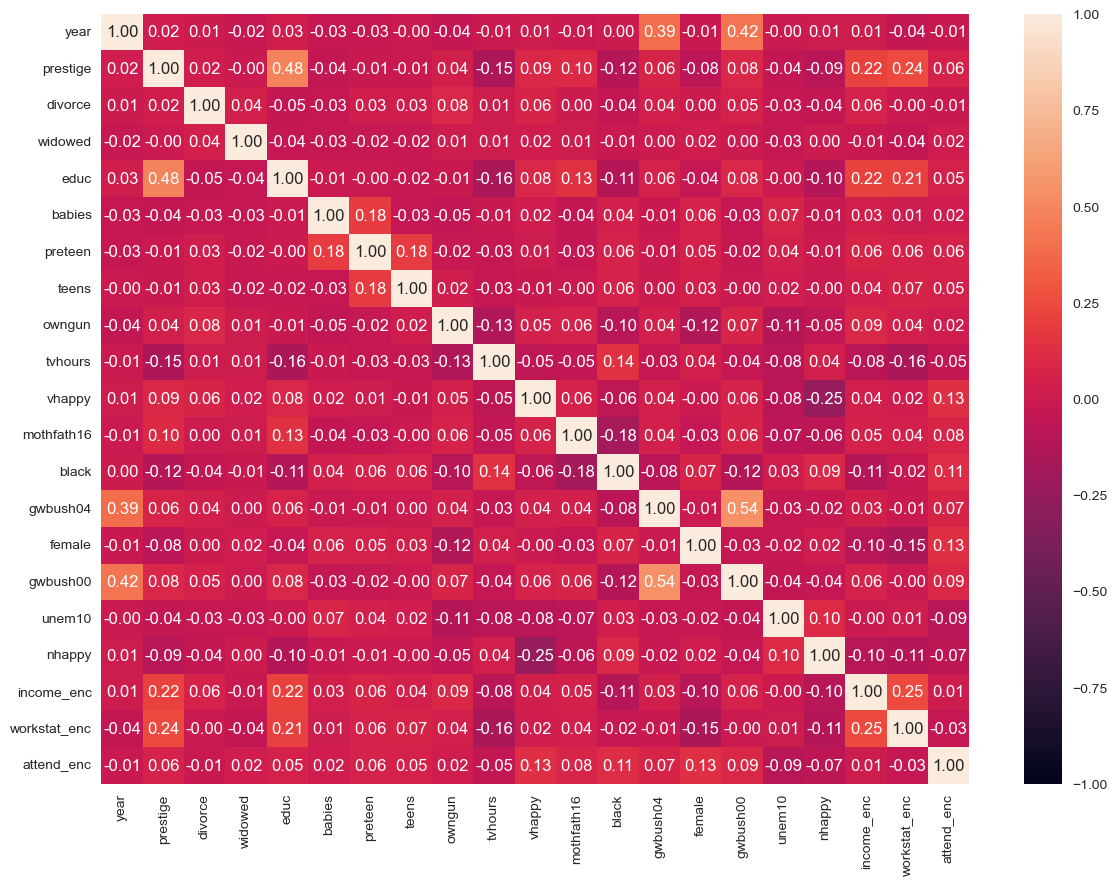

In [174]:
# Plotting an heatmap in order to get a correlation matrix
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
heatmap = sb.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")

In [175]:
# We noticed that both GW Bush columns are correlated
df[['gwbush00','gwbush04']]

,gwbush00,gwbush04
rownames,,
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
...,...,...
17133,0,0
17134,1,1
17135,0,0


In [176]:
# Here we basically want to merge the information of those columns
df2['gwbush'] = df2.apply(lambda row: 1 if (row['gwbush00'] == 1 or row['gwbush04'] == 1) else 0, axis=1)

In [177]:
# & drop the originals ones
df2 = df2.drop(["gwbush00", "gwbush04"], axis=1)

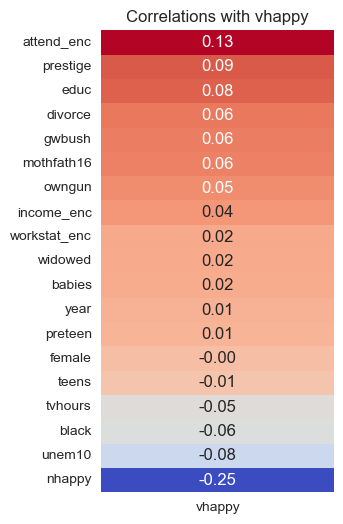

In [178]:
# We think that vhappy and nhappy might be good target in this dataset
# Let's investigate those variable

correlation_matrix = df2.corr()

# Sort correlations in descending order
correlations_with_target = correlation_matrix["vhappy"].sort_values(ascending=False)

# Remove the target column from the list
correlations_with_target = correlations_with_target.drop("vhappy")

# Set the figure size
plt.figure(figsize=(3, 6))

# Create a heatmap
sb.heatmap(correlations_with_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=False)

# Set the title
plt.title(f'Correlations with {"vhappy"}')

# Show the plot
plt.show()

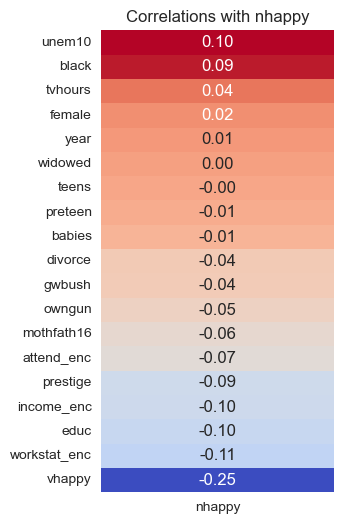

In [179]:
# nhappy
correlation_matrix = df2.corr()

# Sort correlations in descending order
correlations_with_target = correlation_matrix["nhappy"].sort_values(ascending=False)

# Remove the target column from the list
correlations_with_target = correlations_with_target.drop("nhappy")

# Set the figure size
plt.figure(figsize=(3, 6))

# Create a heatmap
sb.heatmap(correlations_with_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=False)

# Set the title
plt.title(f'Correlations with {"nhappy"}')

# Show the plot
plt.show()

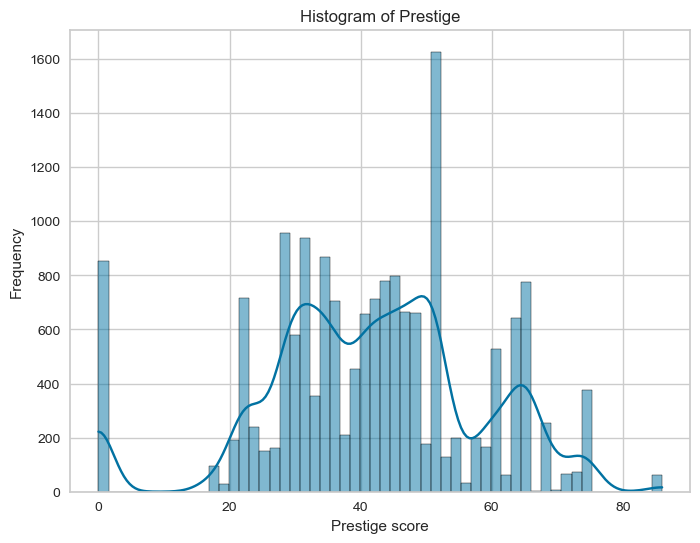

In [180]:
# Distribution of prestige
plt.figure(figsize=(8, 6))
sb.histplot(df2['prestige'], kde=True)
plt.title('Histogram of Prestige')
plt.xlabel('Prestige score')
plt.ylabel('Frequency')
plt.show()

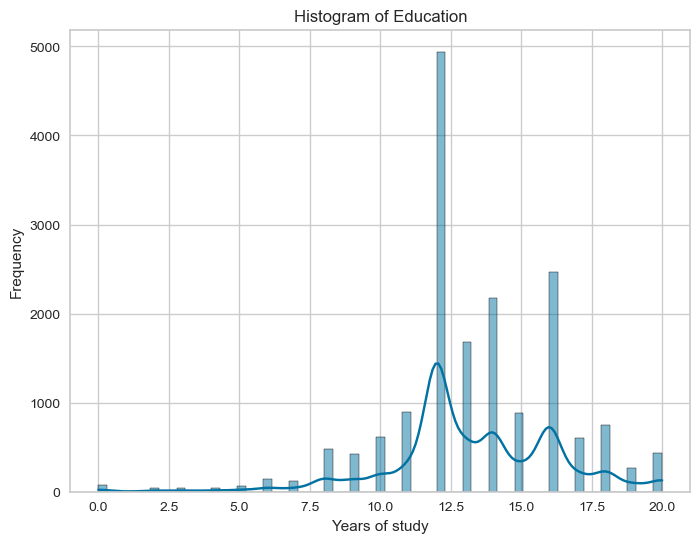

In [181]:
# Distribution of educ
plt.figure(figsize=(8, 6))
sb.histplot(df2['educ'], kde=True)
plt.title('Histogram of Education')
plt.xlabel('Years of study')
plt.ylabel('Frequency')
plt.show()

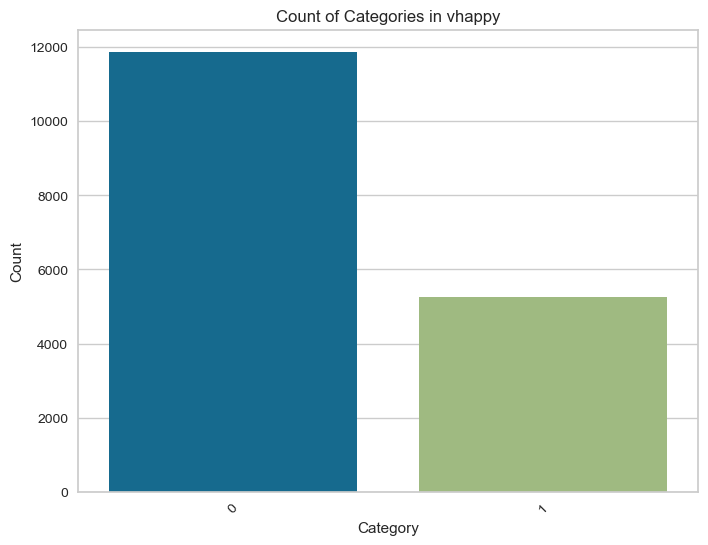

In [182]:
# vhappy distribution
plt.figure(figsize=(8, 6))
sb.countplot(data=df2, x='vhappy')
plt.title('Count of Categories in vhappy')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

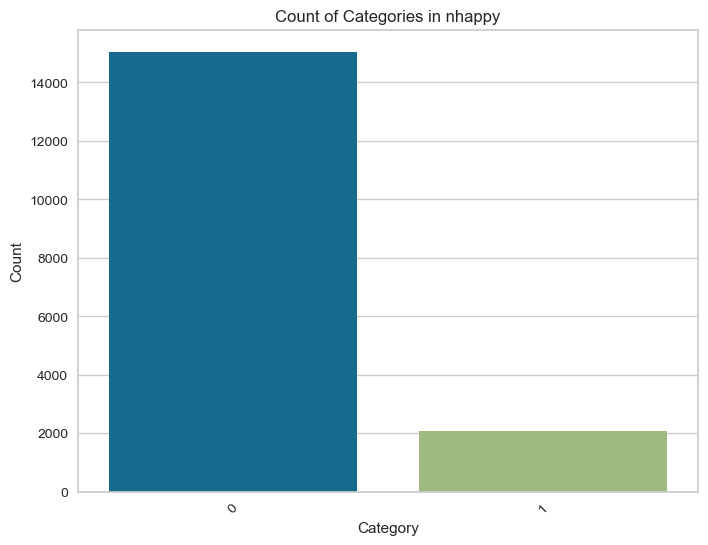

In [183]:
# nhappy distribution
plt.figure(figsize=(8, 6))
sb.countplot(data=df2, x='nhappy')
plt.title('Count of Categories in nhappy')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

In [184]:
# Export cleaned DF to new csv file
df2.to_csv(".\\happy_cleaned.csv")

### Modeling

In [185]:
import sklearn
from sklearn.model_selection import train_test_split

In [186]:
df = pd.read_csv("happy_cleaned.csv", index_col=0)

In [187]:
display(df)

,year,prestige,divorce,widowed,educ,babies,preteen,teens,owngun,tvhours,vhappy,mothfath16,black,female,unem10,nhappy,income_enc,workstat_enc,attend_enc,gwbush
rownames,,,,,,,,,,,,,,,,,,,,
1,1994,46.0,0,0,12.0,2.0,3.0,0.0,0,2.0,0,1.0,1,1,1,0,9.0,2,3.0,0
2,1994,22.0,0,0,12.0,0.0,0.0,0.0,0,3.0,1,0.0,1,0,0,0,0.0,4,7.0,0
3,1994,29.0,0,0,12.0,0.0,0.0,0.0,0,1.0,0,0.0,1,1,0,0,10.0,4,8.0,0
4,1994,42.0,1,0,8.0,0.0,0.0,0.0,0,3.0,0,0.0,0,0,1,1,10.0,4,2.0,0
5,1994,36.0,0,0,13.0,0.0,1.0,1.0,0,0.0,0,0.0,1,1,0,1,9.0,3,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17133,2006,29.0,0,0,9.0,0.0,0.0,0.0,0,1.0,0,0.0,0,1,0,0,3.0,2,1.0,0
17134,2006,51.0,0,0,16.0,0.0,1.0,1.0,0,1.0,0,1.0,0,0,0,0,12.0,1,4.0,1
17135,2006,0.0,1,0,8.0,0.0,0.0,0.0,0,4.0,0,1.0,0,1,0,0,6.0,2,0.0,0


In [188]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, cohen_kappa_score, roc_curve, auc
import datetime


class Classifier:
       
    def __init__(self, model):
        self.model = model
   
    def workflow(self, X, y):
        self.start = datetime.datetime.now()
        self.split_and_stratify(X, y)
        self.train()
        return self.score()


    def split_and_stratify(self, X, y, test_size=0.2):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        return X_train, X_test, y_train, y_test
   
    def train(self):
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        return self
       
    def score(self):
        accuracy = accuracy_score(self.y_test, self.y_pred)
        f1 = f1_score(self.y_test, self.y_pred)
        kappa = cohen_kappa_score(self.y_test, self.y_pred)
        y_prob = self.model.predict_proba(self.X_train)[:, 1]
        roc_auc = roc_auc_score(self.y_train, y_prob)


        return {'Model':str(self.model)[:str(self.model).index('(')],
                'Accuracy':accuracy,
                    'ROC AUC':roc_auc,
                    'F1':f1,
                    'Kappa':kappa,
                    'Time taken': (datetime.datetime.now() - self.start).total_seconds()}

In [189]:
# First I create models using vhappy as a predictor
X_preprocessed = df.drop(columns=["vhappy"])
y_vhappy = df["vhappy"]

In [190]:
from sklearn.linear_model import LogisticRegression

# Logistic Regresion
# Initially, there was a convergence warning since the optimization algorithm failed to converge to a solution with the default number of max iterations
# The number of max interations was thus increased
logreg_scores = Classifier(LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42)).workflow(X_preprocessed, y_vhappy)

In [191]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree classifier 
DTC_scores = Classifier(DecisionTreeClassifier(random_state=42)).workflow(X_preprocessed, y_vhappy)

In [192]:
from sklearn.neighbors import KNeighborsClassifier

# K neighbors Classifier
KNN_scores = Classifier(KNeighborsClassifier()).workflow(X_preprocessed, y_vhappy)

In [193]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier 
RF_scores = Classifier(RandomForestClassifier(random_state=42)).workflow(X_preprocessed, y_vhappy)

In [194]:
from sklearn.svm import SVC

# Support Vector machine Classifier (probability-True required for ROC AUC -calcs.)
SVM_scores = Classifier(SVC(probability= True, random_state=42)).workflow(X_preprocessed, y_vhappy)

In [195]:
results = [logreg_scores, DTC_scores, KNN_scores, RF_scores, SVM_scores]
binary_classification_scores = pd.DataFrame(results).set_index("Model").round(3)
display(binary_classification_scores)

,Accuracy,ROC AUC,F1,Kappa,Time taken
Model,,,,,
LogisticRegression,0.700,0.675,0.143,0.073,0.550
DecisionTreeClassifier,0.603,1.000,0.364,0.076,0.082
KNeighborsClassifier,0.645,0.785,0.294,0.072,0.383
RandomForestClassifier,0.692,1.000,0.265,0.120,1.837
SVC,0.693,0.569,0.000,0.000,33.857


In [196]:
# First we create models using nhappy as a predictor
X_preprocessed_nhappy = df.drop(columns=["nhappy"])
y_nhappy = df["nhappy"]

In [197]:
from sklearn.linear_model import LogisticRegression

# Logistic Regresion
# Initially, there was a convergence warning since the optimization algorithm failed to converge to a solution with the default number of max iterations
# The number of max interations was thus increased
logreg_scores1 = Classifier(LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42)).workflow(X_preprocessed_nhappy, y_nhappy)

In [198]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree classifier 
DTC_scores1 = Classifier(DecisionTreeClassifier(random_state=42)).workflow(X_preprocessed_nhappy, y_nhappy)

In [199]:
from sklearn.neighbors import KNeighborsClassifier

# K neighbors Classifier
KNN_scores1 = Classifier(KNeighborsClassifier()).workflow(X_preprocessed_nhappy, y_nhappy)

In [200]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier 
RF_scores1 = Classifier(RandomForestClassifier(random_state=42)).workflow(X_preprocessed_nhappy, y_nhappy)

In [201]:
from sklearn.svm import SVC

# Support Vector machine Classifier (probability-True required for ROC AUC -calcs.)
SVM_scores1 = Classifier(SVC(probability= True, random_state=42)).workflow(X_preprocessed_nhappy, y_nhappy)

In [202]:
# nhappy results
results = [logreg_scores1, DTC_scores1, KNN_scores1, RF_scores1, SVM_scores1]
binary_classification_scores = pd.DataFrame(results).set_index("Model").round(3)
display(binary_classification_scores)

,Accuracy,ROC AUC,F1,Kappa,Time taken
Model,,,,,
LogisticRegression,0.879,0.776,0.023,0.018,0.615
DecisionTreeClassifier,0.791,1.000,0.246,0.127,0.067
KNeighborsClassifier,0.863,0.875,0.056,0.018,0.313
RandomForestClassifier,0.877,1.000,0.054,0.039,1.330
SVC,0.878,0.607,0.000,0.000,26.498


In [203]:
# vhappy results
results = [logreg_scores, DTC_scores, KNN_scores, RF_scores, SVM_scores]
binary_classification_scores = pd.DataFrame(results).set_index("Model").round(3)
display(binary_classification_scores)

,Accuracy,ROC AUC,F1,Kappa,Time taken
Model,,,,,
LogisticRegression,0.700,0.675,0.143,0.073,0.550
DecisionTreeClassifier,0.603,1.000,0.364,0.076,0.082
KNeighborsClassifier,0.645,0.785,0.294,0.072,0.383
RandomForestClassifier,0.692,1.000,0.265,0.120,1.837
SVC,0.693,0.569,0.000,0.000,33.857


In [204]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
 
params = {'n_estimators': [1, 5, 10, 30],
          'max_features': [1, 5, 7, 10],
          'max_depth': [1, 3, 5, 10],
          'min_samples_split': [2, 4, 6, 10],
          'min_samples_leaf': [1, 2, 3, 5],
          'bootstrap': [True, False]}

In [210]:
# First let's use GridSearchCV for vhappy
 
rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_grid, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
 
results_grid = grid_search.fit(X_preprocessed, y_vhappy)  
best_params_grid = results_grid.best_params_
print("Best Parameters (GridSearch):", best_params_grid)
 
tuned_model_grid = results_grid.best_estimator_

Best Parameters (GridSearch): {'bootstrap': False, 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 30}


In [211]:
# use GridSearchCV for nhappy

grid_search_nhappy = GridSearchCV(rf_grid, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
 
results_grid_nhappy = grid_search_nhappy.fit(X_preprocessed, y_nhappy)  
best_params_grid_nhappy = results_grid_nhappy.best_params_
print("Best Parameters (GridSearch) nhappy:", best_params_grid_nhappy)
 
tuned_model_grid_nhappy = results_grid_nhappy.best_estimator_

Best Parameters (GridSearch) nhappy: {'bootstrap': True, 'max_depth': 1, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1}


## PCA

In [92]:
from fanalysis.pca import PCA
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.preprocessing import StandardScaler

In [93]:
# Read in clean dataset
df = pd.read_csv("happy_cleaned.csv").set_index('rownames')
df

,year,prestige,divorce,widowed,educ,babies,preteen,teens,owngun,tvhours,vhappy,mothfath16,black,female,unem10,nhappy,income_enc,workstat_enc,attend_enc,gwbush
rownames,,,,,,,,,,,,,,,,,,,,
1,1994,46.0,0,0,12.0,2.0,3.0,0.0,0,2.0,0,1.0,1,1,1,0,9.0,2,3.0,0
2,1994,22.0,0,0,12.0,0.0,0.0,0.0,0,3.0,1,0.0,1,0,0,0,0.0,4,7.0,0
3,1994,29.0,0,0,12.0,0.0,0.0,0.0,0,1.0,0,0.0,1,1,0,0,10.0,4,8.0,0
4,1994,42.0,1,0,8.0,0.0,0.0,0.0,0,3.0,0,0.0,0,0,1,1,10.0,4,2.0,0
5,1994,36.0,0,0,13.0,0.0,1.0,1.0,0,0.0,0,0.0,1,1,0,1,9.0,3,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17133,2006,29.0,0,0,9.0,0.0,0.0,0.0,0,1.0,0,0.0,0,1,0,0,3.0,2,1.0,0
17134,2006,51.0,0,0,16.0,0.0,1.0,1.0,0,1.0,0,1.0,0,0,0,0,12.0,1,4.0,1
17135,2006,0.0,1,0,8.0,0.0,0.0,0.0,0,4.0,0,1.0,0,1,0,0,6.0,2,0.0,0


In [94]:
# Set the dimension of [X]
p = df.shape[1]

# Set the sample size of [X]
n = df.shape[0]

# define the matrix itself
X = df.values

df.columns

Index(['year', 'prestige', 'divorce', 'widowed', 'educ', 'babies', 'preteen',
       'teens', 'owngun', 'tvhours', 'vhappy', 'mothfath16', 'black', 'female',
       'unem10', 'nhappy', 'income_enc', 'workstat_enc', 'attend_enc',
       'gwbush'],
      dtype='object')

In [95]:
scaler = StandardScaler()
non_binary_columns = ['prestige', 'educ', 'babies', 'preteen', 'teens', 'tvhours', 'income_enc', 'workstat_enc', 'attend_enc']
df[non_binary_columns] = scaler.fit_transform(df[non_binary_columns])
pca = PCA(row_labels=df.index, col_labels=df.columns)
pca.fit(df.values)

eigen_values = pca.eig_[0]
explained_var = pca.eig_[2]

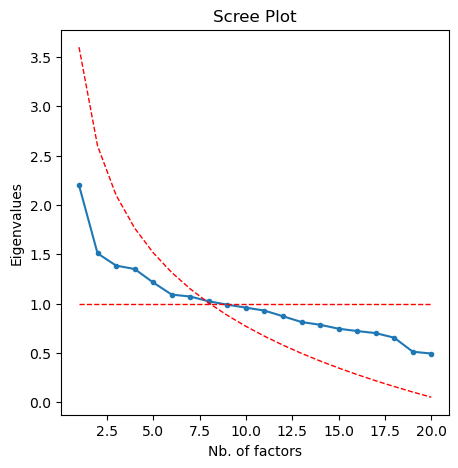

In [96]:
# Plotting the Eigenvalues

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1), eigen_values,".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree Plot")
ax.plot([1,p],[1,1],"r--",linewidth=1)
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))
ax.plot(range(1,p+1),b,"r--",linewidth=1)

plt.show()

Interesting shape, couple of potential elbows, let's have a look at the other plots

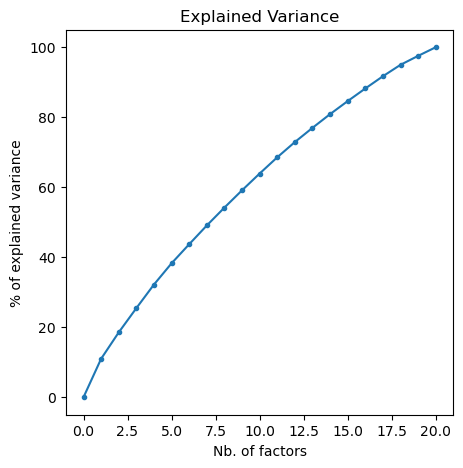

In [97]:
# Plotting the explained variance

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,explained_var),".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("% of explained variance")
plt.title("Explained Variance")
plt.show()

Again, not especially helpful! after the first few factors the slope's gradient remains fairly constant (if descending slightly)

In [98]:
# Key Statistics

C = -(n-1-(2*p+5)/6) * np.sum(np.log(eigen_values))
ddl = p*(p-1)/2
p_value = 1-stats.chi2.cdf(C,df=ddl)
kss = 1+2*math.sqrt((p-1)/(n-1))

print(f"Barlett's statistics: {C:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Karlis-Saporta-Spinaki threshold: {kss:.3f}")

Barlett's statistics: 22432.864
p-value: 0.000
Karlis-Saporta-Spinaki threshold: 1.067


**Bartlett's Test Statistic:**

- Used to assess whether the variables in your dataset are suitable for PCA.
- Measure of how well your data meets the assumption of multivariate normality. Higher the more suitable for PCA
- 22432.864 is high, indicating PCA is likely appropriate. The assumption of multivariate normality is met, which is a good sign for the validity of PCA.

**p-value:**

- The significance level of the test.
- As it is 0 we can reject the null hypothesis that the data doesn't have multivariate normal distribution
- This is assumed for PCA, so is necessary for it to be applicable.

**Karlis-Saporta-Spinaki Threshold:** 

- A method to help decide how many principal components to keep.
- We would keep all the components with eigenvalues greater than this threshold, in this case being 1.067, it corresponds with our scree plot

With all this in mind, 6 factors seems a good amount to keep: that remains above the kaiser threshold line, the Karlis-Saporta-Spinaki threshold and the broken sticks threshold

                    F1        F2        F3        F4        F5        F6
year          0.118504 -0.631832  0.075778 -0.553754  0.062597 -0.031149
prestige      0.664488  0.130846 -0.028015 -0.089881 -0.296459  0.167255
divorce       0.081643 -0.126375  0.077466  0.167395  0.443017 -0.039975
widowed      -0.030455 -0.114063  0.011559  0.202109  0.039366  0.101853
educ          0.647506  0.138540 -0.003322 -0.151488 -0.400177  0.087644
babies       -0.054942  0.258421  0.341555 -0.191824  0.014180 -0.582095
preteen       0.008687  0.323122  0.503828 -0.210254  0.328607 -0.070500
teens         0.023430  0.179703  0.337553 -0.142964  0.397848  0.455161
owngun        0.237700 -0.100802 -0.119595  0.295366  0.509282  0.122242
tvhours      -0.389877 -0.144246  0.029269  0.083210 -0.121242  0.060712
vhappy        0.287718 -0.167864  0.359643  0.364629 -0.030798 -0.313844
mothfath16    0.317975 -0.146455 -0.045258  0.235039 -0.101894  0.063347
black        -0.369004  0.172699  0.311152 -0.15719

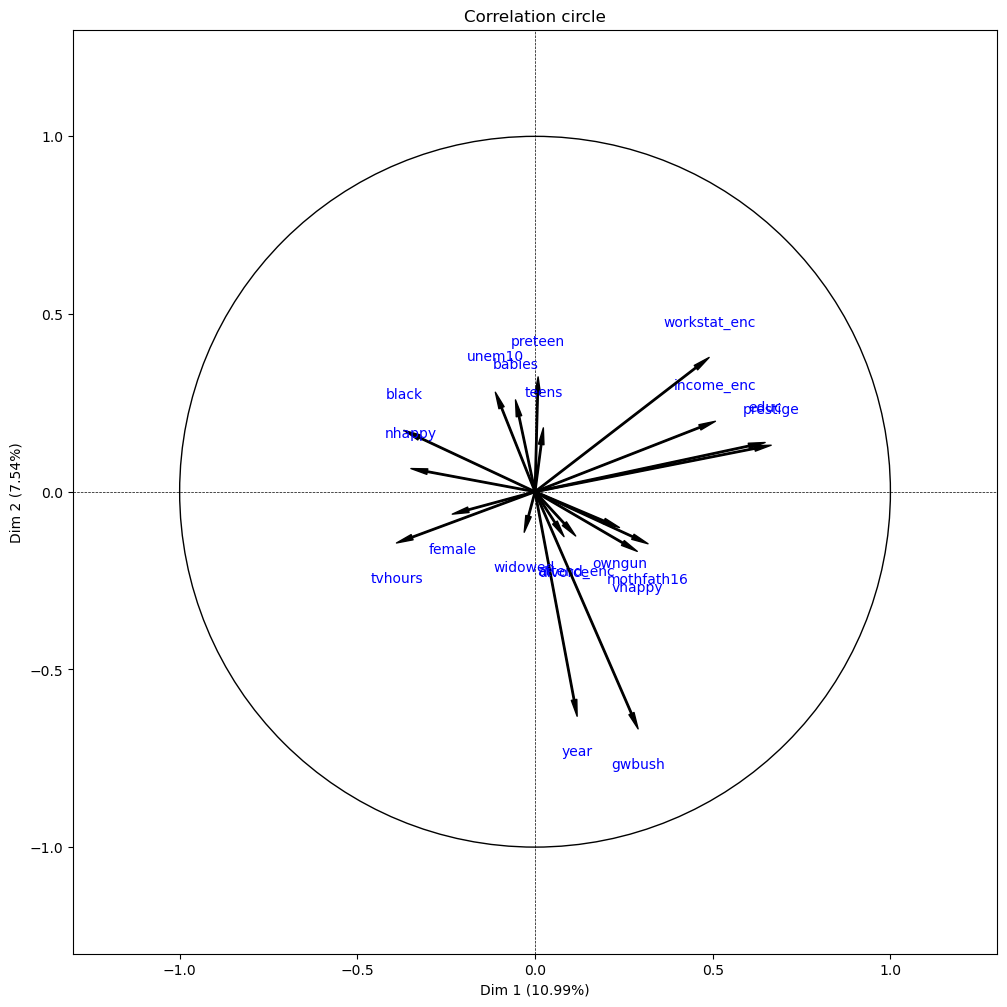

In [100]:
# Variable Representation
#Let's have a look at the correlation circle for the first 2 factos

print(pd.DataFrame(pca.col_coord_[:,:6],index=df.columns, columns=['F1','F2','F3','F4','F5','F6']))
pca.correlation_circle(num_x_axis=1,num_y_axis=2, figsize=(12,12))

Some interesting results:
- there is a grouping of prestige, educ, income_enc, workstat_enc which seem very linked and equally explainable by the first 2 factors
- Also completely inversley to tvhours and female
- Similarly all amounts of children (preteen, babies, teens) similarly explainable to unem10, and do not looked correlated to factor one at all
- black/nhappy and female/tvhours linked in factor 1 but inversley linked in factor 2

Overall 

In [101]:
df

,year,prestige,divorce,widowed,educ,babies,preteen,teens,owngun,tvhours,vhappy,mothfath16,black,female,unem10,nhappy,income_enc,workstat_enc,attend_enc,gwbush
rownames,,,,,,,,,,,,,,,,,,,,
1,1994,0.260298,0,0,-0.420161,3.327614,4.428707,-0.366289,0,0.000595,0,1.0,1,1,1,0,-0.103392,-0.988553,-0.214639,0
2,1994,-1.189479,0,0,-0.420161,-0.381832,-0.410079,-0.366289,0,0.425555,1,0.0,1,0,0,0,-2.269143,0.842889,1.241670,0
3,1994,-0.766628,0,0,-0.420161,-0.381832,-0.410079,-0.366289,0,-0.424365,0,0.0,1,1,0,0,0.137247,0.842889,1.605747,0
4,1994,0.018668,1,0,-1.728178,-0.381832,-0.410079,-0.366289,0,0.425555,0,0.0,0,0,1,1,0.137247,0.842889,-0.578717,0
5,1994,-0.343776,0,0,-0.093157,-0.381832,1.202849,1.663819,0,-0.849325,0,0.0,1,1,0,1,-0.103392,-0.072832,-0.578717,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17133,2006,-0.766628,0,0,-1.401174,-0.381832,-0.410079,-0.366289,0,-0.424365,0,0.0,0,1,0,0,-1.547226,-0.988553,-0.942794,0
17134,2006,0.562335,0,0,0.887855,-0.381832,1.202849,1.663819,0,-0.424365,0,1.0,0,0,0,0,0.618525,-1.904274,0.149438,1
17135,2006,-2.518441,1,0,-1.728178,-0.381832,-0.410079,-0.366289,0,0.850515,0,1.0,0,1,0,0,-0.825309,-0.988553,-1.306871,0


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

def calc_permutation_importances(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
    var_importances = {}
    for i in range(len(X_test.columns)): var_importances[X_test.columns[i]] = perm_importance.importances_mean[i]
    sorted_var_importances = {k: v for k, v in sorted(var_importances.items(), key=lambda item: -abs(item[1]))}
    return pd.DataFrame(list(sorted_var_importances.items()), columns=['var', 'var_perm']).set_index('var').round(5)


In [212]:
# Testing with the best model/parameters from previous section
happy_model = RandomForestClassifier(bootstrap=True, max_features=10, min_samples_leaf=5, min_samples_split=2, random_state=42)
unhappy_model = RandomForestClassifier(bootstrap=True, max_features=1, min_samples_leaf=1, min_samples_split=2, random_state=42)
X = df.drop(['nhappy', 'vhappy'], axis=1)

happy_premutation_importances = calc_permutation_importances(happy_model, X, df['vhappy'])
unhappy_premutation_importances = calc_permutation_importances(unhappy_model, X, df['nhappy'])

In [213]:
display(happy_premutation_importances)
display(unhappy_premutation_importances)

,var_perm
var,
attend_enc,0.01042
income_enc,0.00777
year,0.00390
prestige,0.00371
unem10,0.00251
educ,0.00199
workstat_enc,0.00180
teens,0.00164
tvhours,0.00157


,var_perm
var,
tvhours,-0.00094
female,-0.00082
mothfath16,0.00078
educ,-0.00068
gwbush,-0.00057
workstat_enc,-0.00055
year,-0.00054
prestige,-0.00053
owngun,-0.00050


## Clustering

The goal of this part is to discover hidden structures within the data set, and to find logical regroupings that might not be apparent at first sight.

In [105]:
# Importing usefull librairies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [107]:
# Importing dataset
df = pd.read_csv("happy_cleaned.csv", index_col=0)
df

,year,prestige,divorce,widowed,educ,babies,preteen,teens,owngun,tvhours,vhappy,mothfath16,black,female,unem10,nhappy,income_enc,workstat_enc,attend_enc,gwbush
rownames,,,,,,,,,,,,,,,,,,,,
1,1994,46.0,0,0,12.0,2.0,3.0,0.0,0,2.0,0,1.0,1,1,1,0,9.0,2,3.0,0
2,1994,22.0,0,0,12.0,0.0,0.0,0.0,0,3.0,1,0.0,1,0,0,0,0.0,4,7.0,0
3,1994,29.0,0,0,12.0,0.0,0.0,0.0,0,1.0,0,0.0,1,1,0,0,10.0,4,8.0,0
4,1994,42.0,1,0,8.0,0.0,0.0,0.0,0,3.0,0,0.0,0,0,1,1,10.0,4,2.0,0
5,1994,36.0,0,0,13.0,0.0,1.0,1.0,0,0.0,0,0.0,1,1,0,1,9.0,3,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17133,2006,29.0,0,0,9.0,0.0,0.0,0.0,0,1.0,0,0.0,0,1,0,0,3.0,2,1.0,0
17134,2006,51.0,0,0,16.0,0.0,1.0,1.0,0,1.0,0,1.0,0,0,0,0,12.0,1,4.0,1
17135,2006,0.0,1,0,8.0,0.0,0.0,0.0,0,4.0,0,1.0,0,1,0,0,6.0,2,0.0,0


### Quick PCA

During the process of clustering I wasn't able to reach the values from the previous PCA.
That's why I choose to perform the PCA in a new way.

Number of components: 17
Explained Variance Ratios: [0.11930825 0.07884211 0.07208183 0.06748677 0.06030202 0.05801222
 0.056649   0.05452309 0.05379699 0.05129392 0.04955875 0.04798245
 0.04433246 0.0425328  0.04084067 0.0389332  0.03554129]


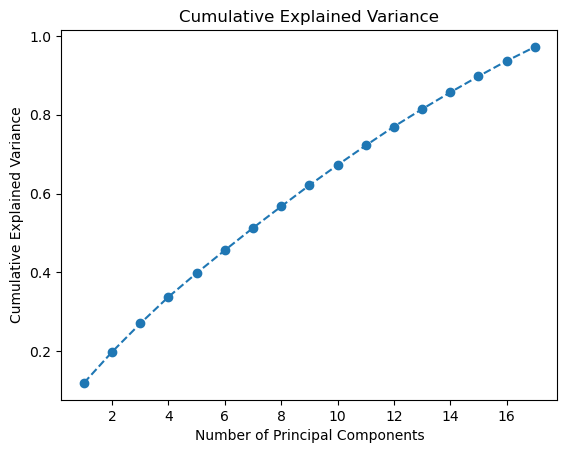

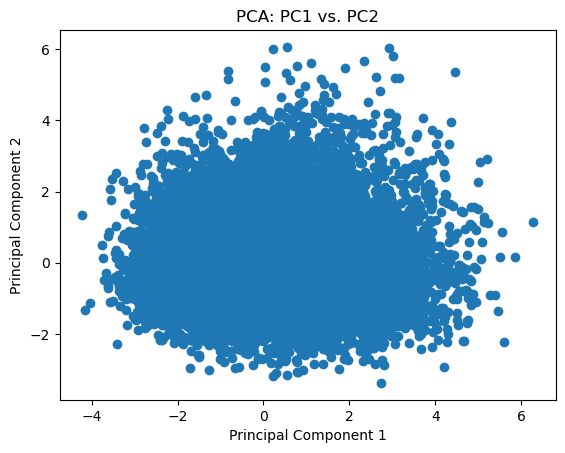

In [108]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separating target from features:
X = df.drop(["year", "vhappy"],axis=1)
y = df['vhappy']

# Standardize the data : basically an obligatory step in PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with no specific number of components
pca = PCA()

# Fit PCA to the standardized data
X_pca = pca.fit_transform(X_scaled)

# Set the desired explained variance threshold
desired_variance = 0.95  # You can change this threshold as needed

# Calculate the number of components required to explain the desired variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= desired_variance) + 1
print("Number of components:", n_components)

# Redefine PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Store the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

# Plot the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

# Visualize the first two principal components
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title("PCA: PC1 vs. PC2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [109]:
# Access the principal components
principal_components = pca.components_

# Create a DataFrame to display the principal components and their relationships to the original features
components_df = pd.DataFrame(principal_components, columns=X.columns)

# Display the components
print(components_df)

    prestige   divorce   widowed      educ    babies   preteen     teens  \
0  -0.464130 -0.044314  0.026596 -0.452285  0.038547 -0.008387 -0.019436   
1   0.070159 -0.101533 -0.143151  0.109243  0.392105  0.503840  0.312288   
2  -0.010146  0.156869  0.141727 -0.019798  0.031434  0.200774  0.203797   
3  -0.271158  0.406928  0.051282 -0.371831  0.003544  0.284874  0.347575   
4  -0.139166 -0.016522 -0.003933 -0.030687  0.422897  0.157365 -0.185663   
5   0.011637 -0.266030 -0.084085  0.022245 -0.464331 -0.079411  0.421089   
6   0.196810  0.466998  0.655629  0.114917 -0.163848 -0.030154  0.031402   
7  -0.035953 -0.255554  0.492529 -0.071234  0.213040 -0.093380 -0.324498   
8  -0.040488 -0.148105  0.321762 -0.001773 -0.093794  0.147044  0.273869   
9  -0.042550 -0.389258  0.329068 -0.019773  0.193453  0.188999  0.033249   
10 -0.187043 -0.283665  0.225236 -0.125821 -0.156965 -0.099538  0.213707   
11 -0.102193  0.346138 -0.081098 -0.096503  0.030136 -0.151302 -0.149968   
12  0.265723

### Kmean clustering

c:\Users\aswin_6glo0nv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aswin_6glo0nv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aswin_6glo0nv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aswin_6glo0nv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

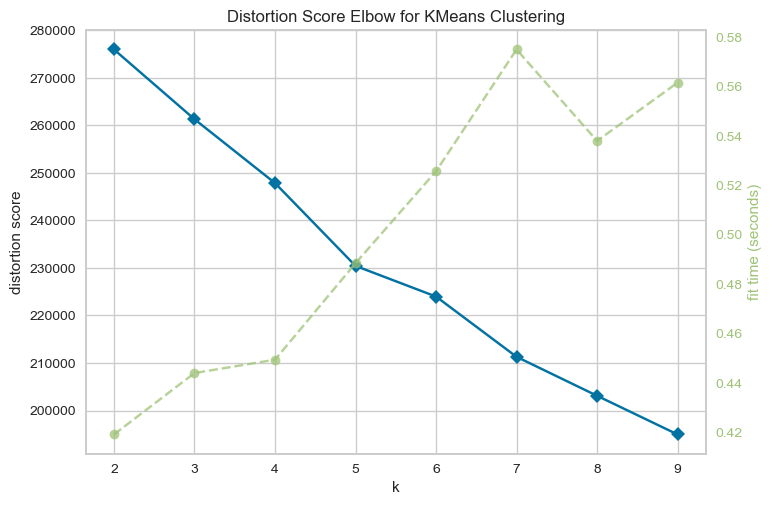

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
from yellowbrick.cluster import KElbowVisualizer

#Defining right amount of cluster using Elbow method
# ---> 4 clusters with kmeans

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(X_pca) # Using PCA values
visualizer.poof()

Before jumping into the clustering I kept in mind that it might not be proper to use it in our specific case, given the data set thatI have and information that I want. <br>
Here we can see on that graph that the Elbow method is struggling to define the optimal number of clusters, this might be due to the large amount of binary features that I have. <br>
I choose to use number of cluster = 4 in order to continue the process.

c:\Users\aswin_6glo0nv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


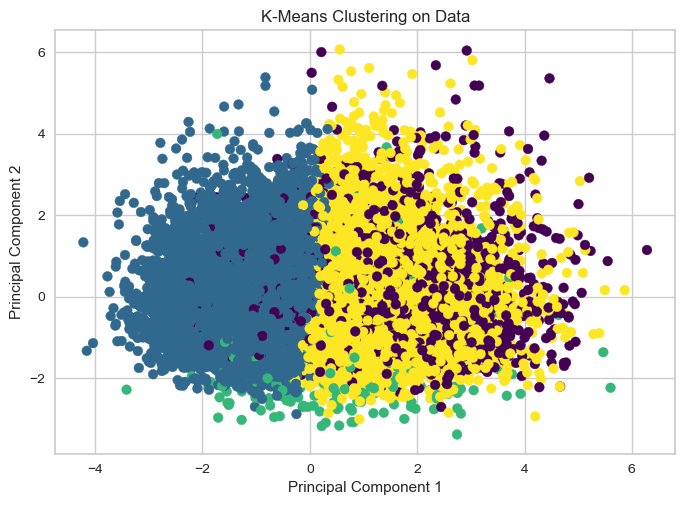

In [113]:
# Based on the Elbow method results select the number of clusters
optimal_n_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Adding cluster labels to DataFrame
df['kmeans_labels'] = kmeans_labels

# Visualize the clustering results (assuming you have only two principal components)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering on Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The graph I have before is the visual representation of our clusters using Kmeans. We can see that it is really messy, the clusters are not properly defined. In fact they seemed to be all merged in one space.
That is not a great result and doesn't help to figure a pattern within the data set.

### DBSCAN clustering

Before performing the clustering using DBSCAN, it is important to define the epsilon (the distance between each data points of the cluster).

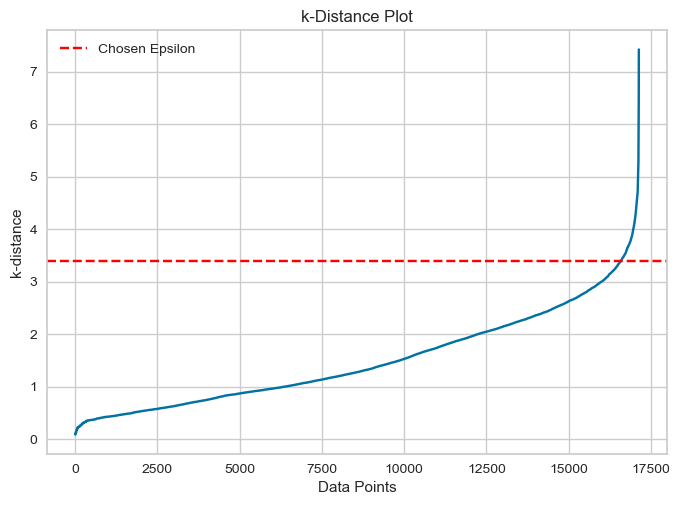

In [114]:
# First we need a method to choose the value of epsilon for DBSCAN
def choose_epsilon(X, min_samples, plot=False):
    from sklearn.neighbors import NearestNeighbors

    # Calculate the k-distance for each point
    nn = NearestNeighbors(n_neighbors=min_samples).fit(X)
    distances, _ = nn.kneighbors(X)
    k_distance = distances[:, -1]

    if plot:
        plt.plot(np.sort(k_distance))
        plt.axhline(y=k_distance[-1], color='red', linestyle='--', label='Chosen Epsilon')
        plt.xlabel('Data Points')
        plt.ylabel('k-distance')
        plt.title('k-Distance Plot')
        plt.legend()
        plt.show()

    return k_distance[-1]

# Define epsilon value
epsilon = choose_epsilon(X_pca, min_samples=5, plot=True)

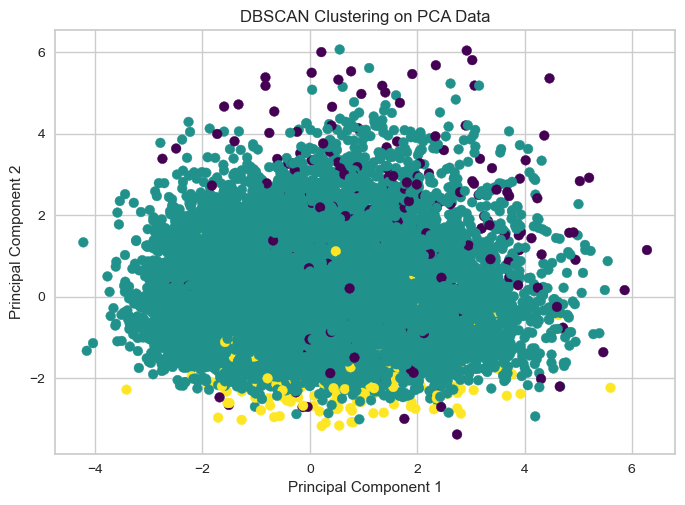

In [115]:
# Perform DBSCAN with epsilon
dbscan = DBSCAN(eps=epsilon, min_samples=5) #using epsilon previously defined
dbscan_labels = dbscan.fit_predict(X_pca)

# Adding cluster labels to DataFrame
df['dbscan_labels'] = dbscan_labels

# Visualize the clustering results (assuming you have only two principal components)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Using the DBSCAN method I'm facing an even worse result. It seems that we have a major cluster regrouping the vast majority of data points, and on the extremities 2 other clusters are defined.

### Agglomerative clustering

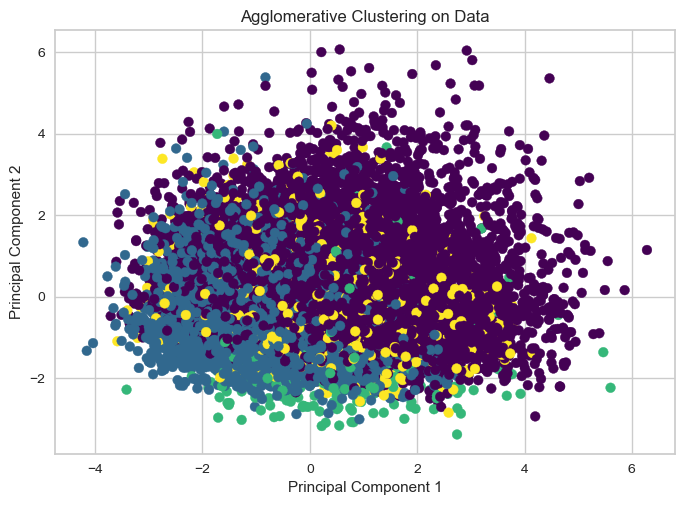

In [116]:
# Agglomerative Clustering
n_clusters = 4 # Using the number we defined before
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(X_pca)

# Adding cluster labels to DataFrame
df['agg_labels'] = agg_labels

# Visualize the clustering results (assuming you have only two principal components)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering on Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Finally, the agglomerative cluster method doesn't provide us with any more convincing results than the previous two. Unlike DBSCAN, the result here divides the majority of data points into 2 overlapping clusters, with another 2 much smaller clusters being created on the extremities.

### Comparison

In [117]:
from sklearn import metrics
print('KMeans')
print('=============')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df,df['kmeans_labels'],  metric = 'sqeuclidean'))
print("calinski_harabasz: %0.3f" % metrics.calinski_harabasz_score(df,df['kmeans_labels'] ))

# For now can't run for DBSCAN because it has only 1 cluster
print('_____________')
print('DBSCAN')
print('=============')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df,df['dbscan_labels'],  metric = 'sqeuclidean'))
print("calinski_harabasz: %0.3f" % metrics.calinski_harabasz_score(df,df['dbscan_labels'] ))

print('_____________')
print('Agglomerative')
print('=============')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df,df['agg_labels'],  metric = 'sqeuclidean'))
print("calinski_harabasz: %0.3f" % metrics.calinski_harabasz_score(df,df['agg_labels'] ))

KMeans
Silhouette Coefficient: 0.060
calinski_harabasz: 1521.980
_____________
DBSCAN
Silhouette Coefficient: -0.083
calinski_harabasz: 26.402
_____________
Agglomerative
Silhouette Coefficient: -0.114
calinski_harabasz: 120.375


Although the 3 methods did not prove successful in defining our clusters, we can nevertheless note the following points: <br>
- K-Means appears to have generated clusters with better separation, as indicated by its positive Silhouette Coefficient and higher Calinski-Harabasz Index.
- DBSCAN and Agglomerative clustering seem to have produced clusters with less clear separation, and the negative Silhouette Coefficients suggest that many data points may not be assigned to any cluster or are part of noise clusters